<a href="https://colab.research.google.com/github/lileeyangg/CoffeeSales_DEA/blob/main/CoffeeSales_DEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Loading and Inspection

In [ ]:
import pandas as pd

#load the data set
data = pd.read_csv('CoffeeSales.csv')

#display information
print(data)

            date                 datetime cash_type                 card  \
0     2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1     2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2     2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
3     2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
4     2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
...          ...                      ...       ...                  ...   
3631  2025-03-23  2025-03-23 10:34:54.894      card  ANON-0000-0000-1158   
3632  2025-03-23  2025-03-23 14:43:37.362      card  ANON-0000-0000-1315   
3633  2025-03-23  2025-03-23 14:44:16.864      card  ANON-0000-0000-1315   
3634  2025-03-23  2025-03-23 15:47:28.723      card  ANON-0000-0000-1316   
3635  2025-03-23  2025-03-23 18:11:38.635      card  ANON-0000-0000-1275   

      money    coffee_name  
0     38.70          Latte  
1     38.70  Hot Chocolate  


In [ ]:
# Number of rows and columns
print("data shape:",data.shape)

data shape: (3636, 6)


In [ ]:
#data type of each column
print(data.dtypes)

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object


In [ ]:
#MISSING VALUES
missing_counts = data.isnull().sum()

# Display the results
print(missing_counts)

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
money_USD       0
time            0
hour            0
dtype: int64


2.Data Cleaning

In [ ]:
#Convert Ukrainian hryvnia to USD
data['money_USD'] = data['money'] * 0.024
data.head()

,date,datetime,cash_type,card,money,coffee_name,money_USD,time,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,0.9288,10:15:50.520,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,0.9288,12:19:22.539,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,0.9288,12:20:18.089,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,0.6936,13:46:33.006,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,0.9288,13:48:14.626,13


In [ ]:
#This breaks down the data into specific month and week
data["datetime"] = pd.to_datetime(data["datetime"], format='mixed')
data["time"] = data["datetime"].dt.time
data["date"] = pd.to_datetime(data["date"])
data["month"] = data["date"].dt.to_period("M")
data["week"] = data["date"].dt.to_period("W")
data

,date,datetime,cash_type,card,money,coffee_name,time,month,week
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,10:15:50.520000,2024-03,2024-02-26/2024-03-03
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:19:22.539000,2024-03,2024-02-26/2024-03-03
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:20:18.089000,2024-03,2024-02-26/2024-03-03
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,13:46:33.006000,2024-03,2024-02-26/2024-03-03
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,13:48:14.626000,2024-03,2024-02-26/2024-03-03
...,...,...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino,10:34:54.894000,2025-03,2025-03-17/2025-03-23
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa,14:43:37.362000,2025-03,2025-03-17/2025-03-23
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa,14:44:16.864000,2025-03,2025-03-17/2025-03-23
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano,15:47:28.723000,2025-03,2025-03-17/2025-03-23


3.Descriptive statistics

In [ ]:
# Calculate descriptive statistics for numerical columns
descriptive_stats = data.describe()

# Display the results
print(descriptive_stats)

             money    money_USD
count  3636.000000  3636.000000
mean     31.746859     0.761925
std       4.919926     0.118078
min      18.120000     0.434880
25%      27.920000     0.670080
50%      32.820000     0.787680
75%      35.760000     0.858240
max      40.000000     0.960000


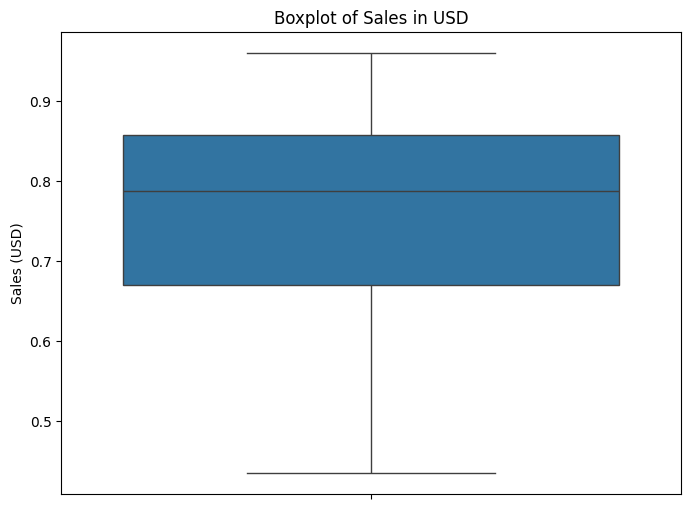

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.boxplot(y=data['money_USD'])

# Add a title
plt.title('Boxplot of Sales in USD')

# Optionally, add labels for axes
plt.ylabel('Sales (USD)')

# Display the plot
plt.show()

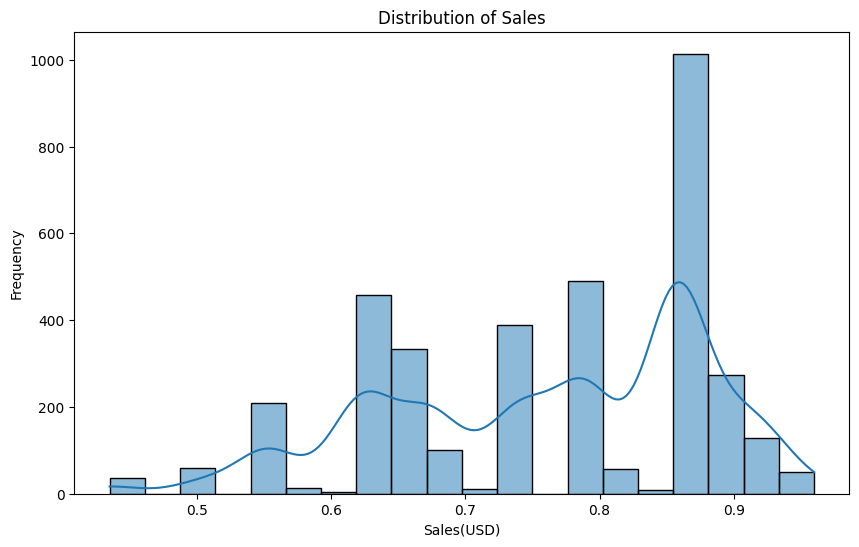

In [ ]:
#DATA DISTRIBUTION: This histogram shows the distrubution of sales and the frequency spent
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data['money_USD'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales(USD)')
plt.ylabel('Frequency')
plt.show()


4. data visualization

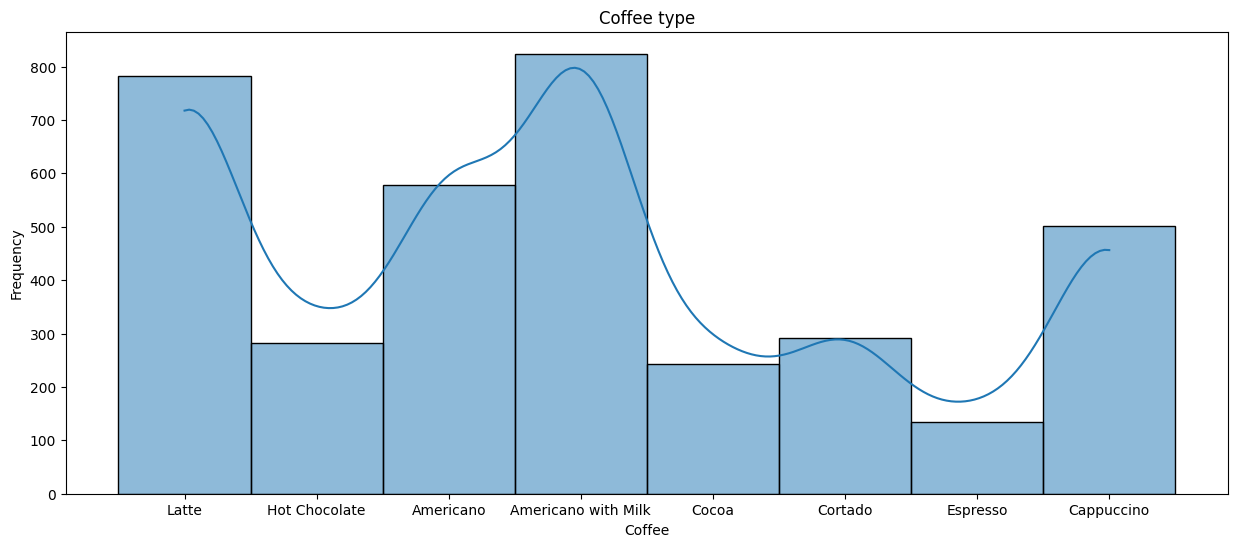

In [ ]:
# this histogram shows the different coffee types and the frequency it was purchased.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.histplot(data['coffee_name'], bins=20, kde=True)
plt.title('Coffee type')
plt.xlabel('Coffee')
plt.ylabel('Frequency')
plt.show()

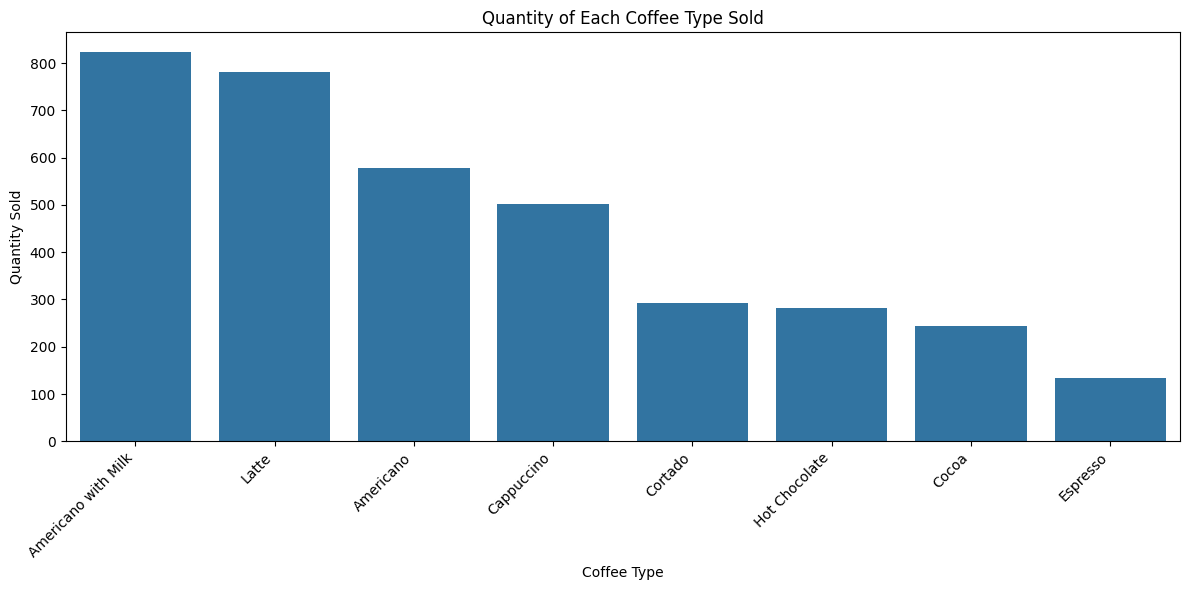

In [ ]:

coffee_counts = data['coffee_name'].value_counts()

plt.figure(figsize=(12, 6))  #
sns.barplot(x=coffee_counts.index, y=coffee_counts.values)
plt.title('Quantity of Each Coffee Type Sold')
plt.xlabel('Coffee Type')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

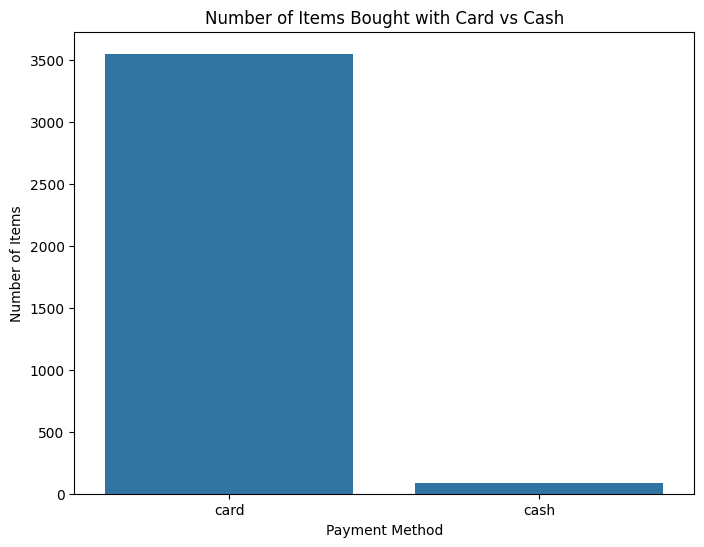

In [ ]:
# Group data by 'cash_type' and count occurrences
cash_type_counts = data['cash_type'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.barplot(x=cash_type_counts.index, y=cash_type_counts.values)
plt.title('Number of Items Bought with Card vs Cash')
plt.xlabel('Payment Method')
plt.ylabel('Number of Items')
plt.show()

Frequency of each coffee type:
coffee_name
Americano with Milk    824
Latte                  782
Americano              578
Cappuccino             501
Cortado                292
Hot Chocolate          282
Cocoa                  243
Espresso               134
Name: count, dtype: int64


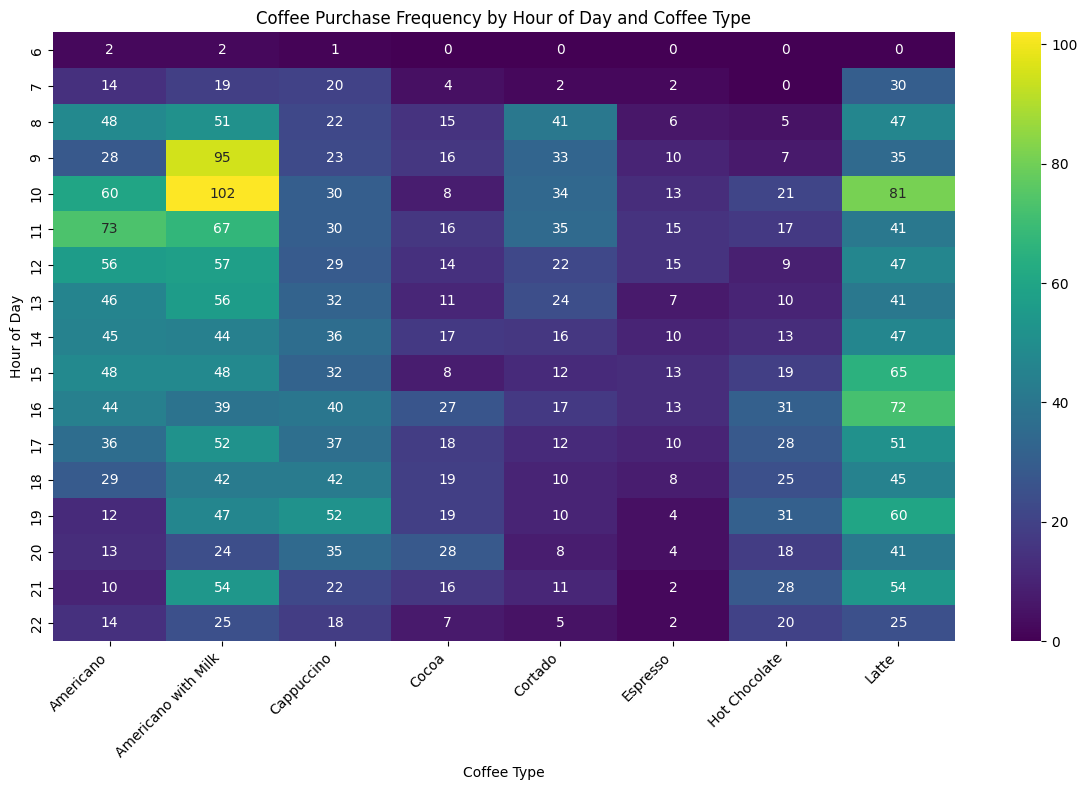

In [ ]:
#5 Correlation Analysis

coffee_type_counts = data['coffee_name'].value_counts()


print("Frequency of each coffee type:")
print(coffee_type_counts)



data['hour'] = data['time'].str.slice(0, 2).astype(int)


heatmap_data = pd.pivot_table(data,
                             index='hour',
                             columns='coffee_name',
                             aggfunc='size',
                             fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='d')
plt.title('Coffee Purchase Frequency by Hour of Day and Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Hour of Day')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6.Time Series Analysis

<Figure size 1400x800 with 0 Axes>

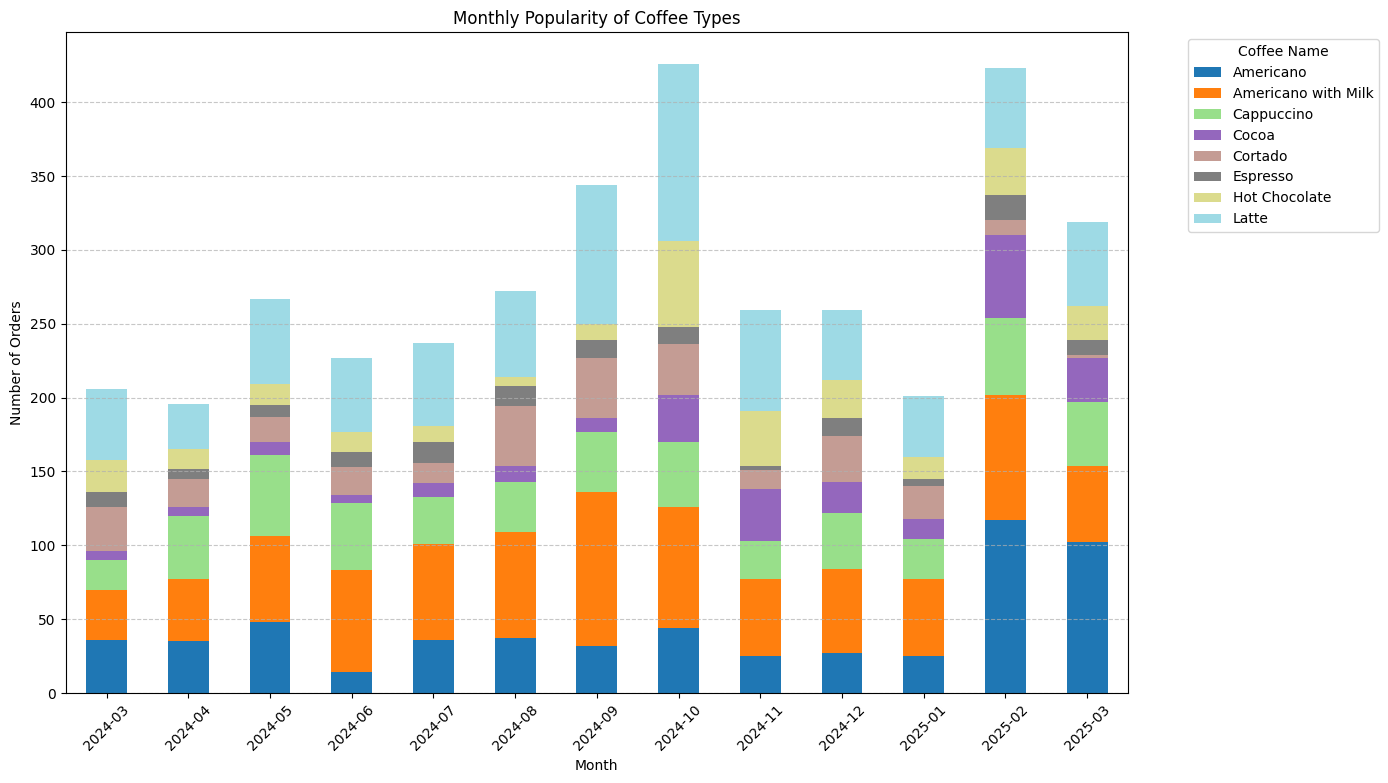

In [ ]:
#Plot shows the coffee type sold in each month.
import matplotlib.pyplot as plt


data['datetime'] = pd.to_datetime(data['datetime'])

data['month'] = data['datetime'].dt.to_period('M')
monthly_coffee_counts = data.groupby(['month', 'coffee_name']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 8))
monthly_coffee_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Monthly Popularity of Coffee Types')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.legend(title='Coffee Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


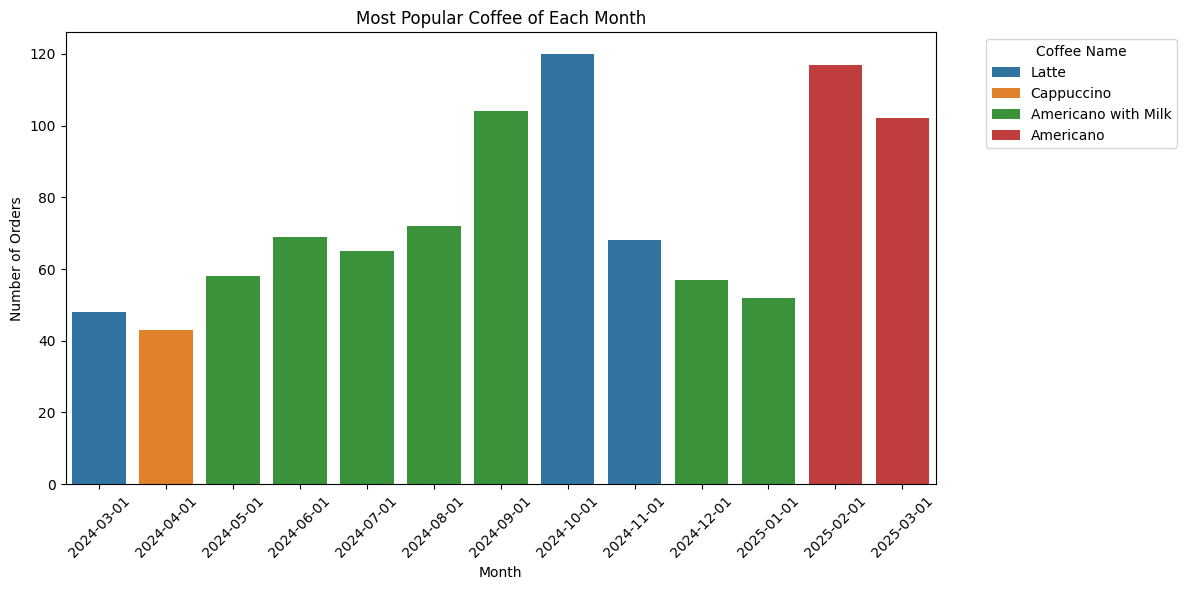

In [ ]:
# Grouping to find the most popular coffee per month
monthly_top_coffee = (
    data.groupby([data['datetime'].dt.to_period('M'), 'coffee_name'])
    .size()
    .reset_index(name='count')
)

monthly_most_popular = monthly_top_coffee.loc[
    monthly_top_coffee.groupby('datetime')['count'].idxmax()
]


monthly_most_popular['datetime'] = monthly_most_popular['datetime'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_most_popular, x='datetime', y='count', hue='coffee_name', dodge=False)
plt.title("Most Popular Coffee of Each Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.legend(title='Coffee Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


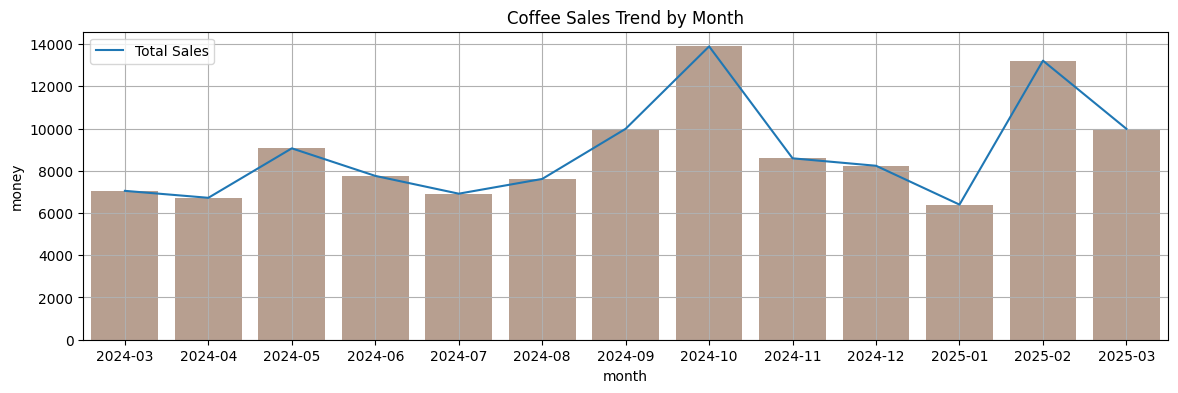

In [ ]:
#Shows the sales trend for each month

data_by_month = data.groupby("month").agg({"money": ["sum", "count"]}).reset_index()
data_by_month.columns = ["month", "money", "cups"]

data_by_month['month'] = data_by_month['month'].astype(str)

plt.figure(figsize=(14, 4))
plt.title("Coffee Sales Trend by Month")
sns.lineplot(data_by_month, x="month", y="money", label="Total Sales")
sns.barplot(data_by_month, y="money", x="month", color="#bd9e8a")
plt.grid()

In [ ]:
#7 Conclusion and Insights

# One challenge was that the money values were not in USD, which made it harder to interpret the data consistently.
# To resolve this, we converted the money column to USD using an appropriate exchange rate, allowing for clearer financial analysis.
# Another challenge was that the dataset had a datetime column that included both date and time, while there was already a separate column for just the date.
# This made it harder to analyze patterns by time of day. To fix this, we extracted only the time portion from the datetime column and created a new otime column.
# This simplified the dataset and made it easier to work with time-based trends.

One challenge was that the money values were not in USD, which made it harder to interpret the data consistently. To resolve this, we converted the money column to USD using an appropriate exchange rate, allowing for clearer financial analysis. Another challenge was that the dataset had a datetime column that included both date and time, while there was already a separate column for just the date.This made it harder to analyze patterns by time of day. To fix this, we extracted only the time portion from the datetime column and created a new otime column. This simplified the dataset and made it easier to work with time-based trends.